# Convolutional Neural Networks: Application

**Goal:** Build and train a CNN for a binary classification problem and a CNN for a multiclass classification problem.

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

2023-02-02 16:21:33.144784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 16:21:33.144802: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Happy dataset

In [2]:
# load data
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


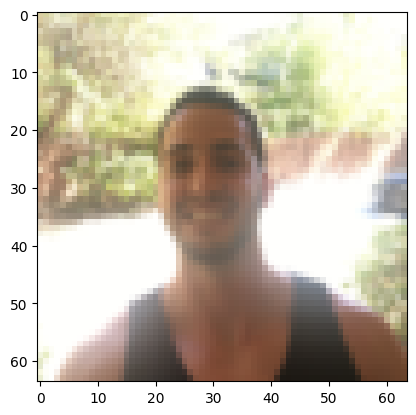

In [3]:
# display image
index = 65
plt.imshow(X_train_orig[index])
plt.show()

**Sequential API:**

In [4]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=3, input_shape=(64,64,3)),
        tfl.Conv2D(filters=32, kernel_size=(7,7), strides=1),
        tfl.BatchNormalization(axis=3),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(units=1, activation='sigmoid')
    ])

    return model

In [5]:
# create model
happy_model = happyModel()

for layer in happy_model.layers:
    print(layer)
    print(f'Output: {layer.output_shape}')

Output: (None, 70, 70, 3)
Output: (None, 64, 64, 32)
Output: (None, 64, 64, 32)
Output: (None, 64, 64, 32)
Output: (None, 32, 32, 32)
Output: (None, 32768)
Output: (None, 1)


2023-02-02 16:21:34.337745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 16:21:34.338064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 16:21:34.338100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-02 16:21:34.338131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-02 16:21:34.338159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
# compile
happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [8]:
# train the model
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 1s 19ms/step - loss: 1.8190 - accuracy: 0.6483
Epoch 2/10
38/38 [==============================] - 1s 20ms/step - loss: 0.2168 - accuracy: 0.9150
Epoch 3/10
38/38 [==============================] - 1s 19ms/step - loss: 0.1712 - accuracy: 0.9383
Epoch 4/10
38/38 [==============================] - 1s 20ms/step - loss: 0.1011 - accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 1s 20ms/step - loss: 0.1318 - accuracy: 0.9533
Epoch 6/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0855 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 1s 19ms/step - loss: 0.1169 - accuracy: 0.9583
Epoch 8/10
38/38 [==============================] - 1s 20ms/step - loss: 0.1060 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 1s 19ms/step - loss: 0.0728 - accuracy: 0.9733
Epoch 10/10
38/38 [==============================] - 1s 19ms/step - loss: 0.1668 - accuracy: 0.9300


In [9]:
# evaluate
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.1881 - accuracy: 0.9200


[0.18813291192054749, 0.9200000166893005]

## SIGNS dataset

In [10]:
# load data
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

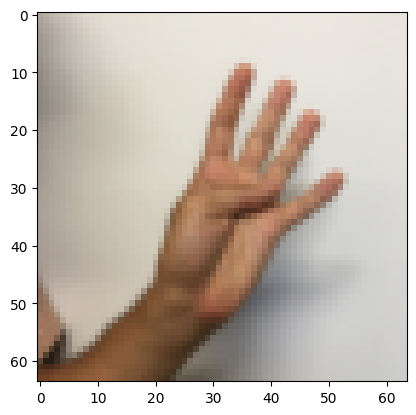

In [11]:
# display image
index = 5
plt.imshow(X_train_orig[index])
plt.show()

In [12]:
# normalize images
X_train = X_train_orig/255
X_test = X_test_orig/255

# convert classes to one hot
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


**Functional API:**

In [13]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=8, kernel_size=(4,4), strides=1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    output = tfl.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=output)

    return model

In [14]:
# create model
conv_model = convolutional_model((64,64,3))

for layer in conv_model.layers:
    print(layer)
    print(f'Output: {layer.output_shape}')

Output: [(None, 64, 64, 3)]
Output: (None, 64, 64, 8)
Output: (None, 64, 64, 8)
Output: (None, 8, 8, 8)
Output: (None, 8, 8, 16)
Output: (None, 8, 8, 16)
Output: (None, 2, 2, 16)
Output: (None, 64)
Output: (None, 6)


In [15]:
# compile model
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# train model
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(4)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(4)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
270/270 [==============================] - 1s 3ms/step - loss: 1.7935 - accuracy: 0.1944 - val_loss: 1.7851 - val_accuracy: 0.1750
Epoch 2/100
270/270 [==============================] - 1s 2ms/step - loss: 1.7721 - accuracy: 0.2352 - val_loss: 1.7628 - val_accuracy: 0.3250
Epoch 3/100
270/270 [==============================] - 1s 2ms/step - loss: 1.7157 - accuracy: 0.2750 - val_loss: 1.6944 - val_accuracy: 0.3333
Epoch 4/100
270/270 [==============================] - 1s 2ms/step - loss: 1.5902 - accuracy: 0.3648 - val_loss: 1.5610 - val_accuracy: 0.3667
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 1.4275 - accuracy: 0.4565 - val_loss: 1.3837 - val_accuracy: 0.5083
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 1.2776 - accuracy: 0.5213 - val_loss: 1.2566 - val_accuracy: 0.5500
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 1.1573 - accuracy: 0.5769 - val_loss: 1.1478 - val_accuracy: 0.5750

The history object contains a record of all loss and metric values during training.

In [17]:
# history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

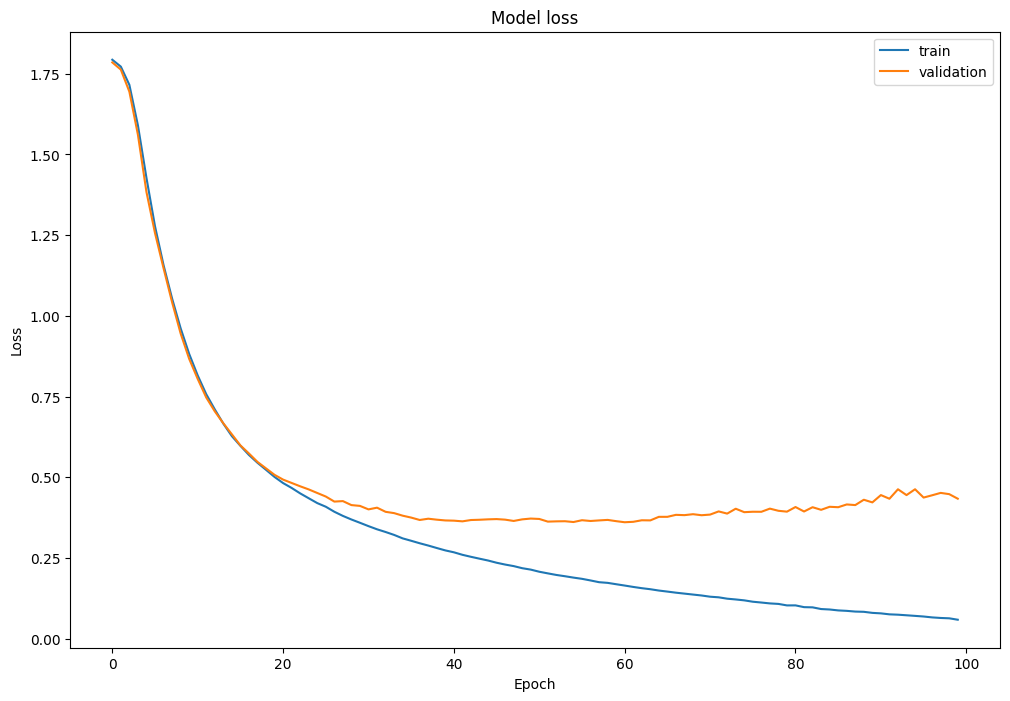

In [18]:
# visualizing loss
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss','val_loss']].copy()
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

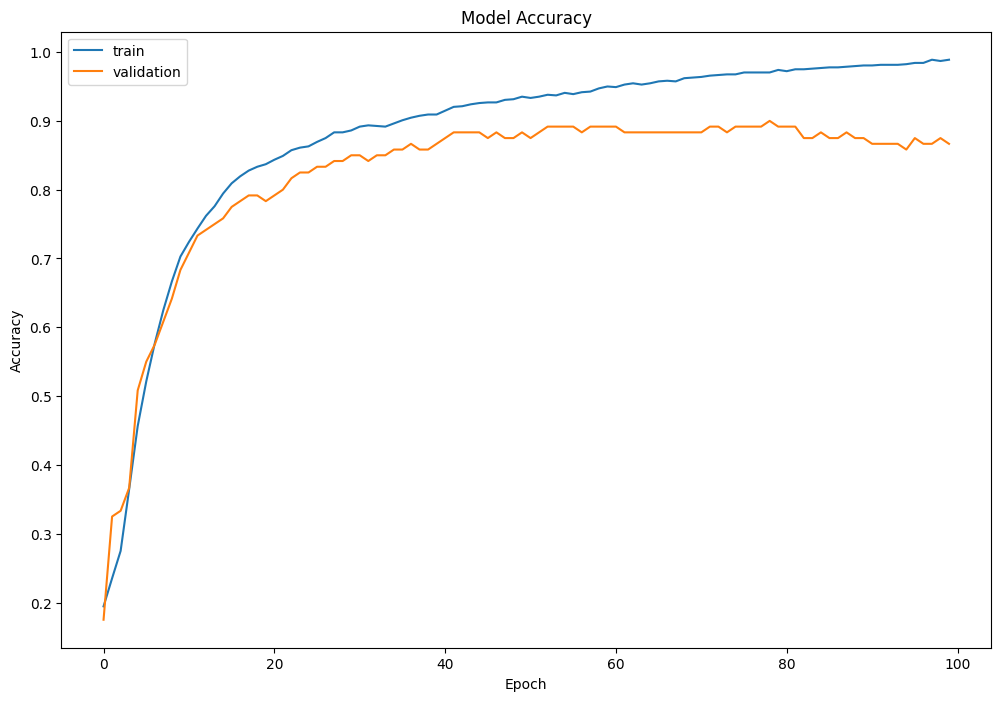

In [19]:
# visualizinc accuracy
df_acc = df_loss_acc[['accuracy','val_accuracy']].copy()
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')